In [1]:
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.3 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadzulzhafran","key":"5686cda5cf3ae2a4d173988f5d2bc804"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d niravnaik/safety-helmet-and-reflective-jacket

Dataset URL: https://www.kaggle.com/datasets/niravnaik/safety-helmet-and-reflective-jacket
License(s): apache-2.0
 99% 513M/518M [00:01<00:00, 282MB/s]
100% 518M/518M [00:01<00:00, 295MB/s]


In [6]:
!unzip -q safety-helmet-and-reflective-jacket.zip

In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
model = YOLO("yolo11m.pt")

model.train(
    data="/content/safety-Helmet-Reflective-Jacket/data.yaml",
    epochs=10,
    imgsz=640,
    batch=16,
    device=0,
    patience=5,
    project="runs/train",
    name="exp"
)

100%|██████████| 38.8M/38.8M [00:00<00:00, 169MB/s]


Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-Helmet-Reflective-Jacket/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=1

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           


  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  8                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    990976  ultralytics.nn.modules.block.C2PSA           [512, 512, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 83.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1546.8±393.9 MB/s, size: 40.7 KB)


train: Scanning /content/safety-Helmet-Reflective-Jacket/train/labels... 7350 images, 33 backgrounds, 0 corrupt: 100%|██████████| 7350/7350 [00:03<00:00, 2354.79it/s]


train: New cache created: /content/safety-Helmet-Reflective-Jacket/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 508.9±157.9 MB/s, size: 49.5 KB)


val: Scanning /content/safety-Helmet-Reflective-Jacket/valid/labels... 1575 images, 8 backgrounds, 0 corrupt: 100%|██████████| 1575/1575 [00:01<00:00, 1263.92it/s]

val: New cache created: /content/safety-Helmet-Reflective-Jacket/valid/labels.cache


Plotting labels to runs/train/exp/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/exp
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.01G      1.371      1.378      1.446         21        640: 100%|██████████| 460/460 [04:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:25<00:00,  1.95it/s]


                   all       1575       5292      0.596      0.455       0.48      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.12G      1.389      1.242      1.458         16        640: 100%|██████████| 460/460 [04:30<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:26<00:00,  1.89it/s]


                   all       1575       5292      0.729      0.647       0.72      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.16G      1.306      1.127      1.398         12        640: 100%|██████████| 460/460 [04:29<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:24<00:00,  2.01it/s]


                   all       1575       5292      0.725      0.676       0.74      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.15G      1.217      0.995       1.34         34        640: 100%|██████████| 460/460 [04:28<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:25<00:00,  2.00it/s]


                   all       1575       5292      0.816      0.729      0.819      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.15G      1.142     0.8956      1.291         22        640: 100%|██████████| 460/460 [04:28<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:24<00:00,  2.03it/s]


                   all       1575       5292      0.858      0.803      0.887      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.15G      1.085     0.8097      1.254         22        640: 100%|██████████| 460/460 [04:28<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:24<00:00,  2.01it/s]


                   all       1575       5292      0.858      0.827        0.9      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.17G       1.03     0.7471      1.215         14        640: 100%|██████████| 460/460 [04:29<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:24<00:00,  2.03it/s]


                   all       1575       5292      0.882      0.842      0.923       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       8.2G     0.9789     0.6817      1.183         30        640: 100%|██████████| 460/460 [04:28<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:24<00:00,  2.04it/s]

                   all       1575       5292      0.894      0.867      0.935        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.18G     0.9378     0.6299      1.154         18        640: 100%|██████████| 460/460 [04:28<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:24<00:00,  2.04it/s]

                   all       1575       5292      0.891      0.882      0.941      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.15G     0.8835     0.5816      1.123         12        640: 100%|██████████| 460/460 [04:29<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:24<00:00,  2.01it/s]

                   all       1575       5292      0.899      0.898      0.949      0.727



10 epochs completed in 0.833 hours.
Optimizer stripped from runs/train/exp/weights/last.pt, 40.5MB
Optimizer stripped from runs/train/exp/weights/best.pt, 40.5MB

Validating runs/train/exp/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]


                   all       1575       5292      0.898      0.898      0.949      0.727
         Safety-Helmet       1290       2966      0.934      0.906       0.96      0.729
     Reflective-Jacket       1317       2326      0.863      0.889      0.937      0.725
Speed: 0.2ms preprocess, 11.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/train/exp


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b892fe01050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/1 /content/safety-Helmet-Reflective-Jacket/test/images/helmet_jacket_08581.jpg: 640x640 2 Safety-Helmets, 1 Reflective-Jacket, 36.8ms
Speed: 2.2ms preprocess, 36.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/safety-Helmet-Reflective-Jacket/test/images/helmet_jacket_08235.jpg: 640x640 2 Safety-Helmets, 2 Reflective-Jackets, 36.8ms
Speed: 1.8ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/safety-Helmet-Reflective-Jacket/test/images/helmet_jacket_08340.jpg: 640x640 3 Safety-Helmets, 2 Reflective-Jackets, 36.8ms
Speed: 1.8ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/safety-Helmet-Reflective-Jacket/test/images/helmet_jacket_07895.jpg: 640x640 1 Reflective-Jacket, 36.8ms
Speed: 1.7ms preprocess, 36.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/safety-Helmet-Reflective-Jacket/test

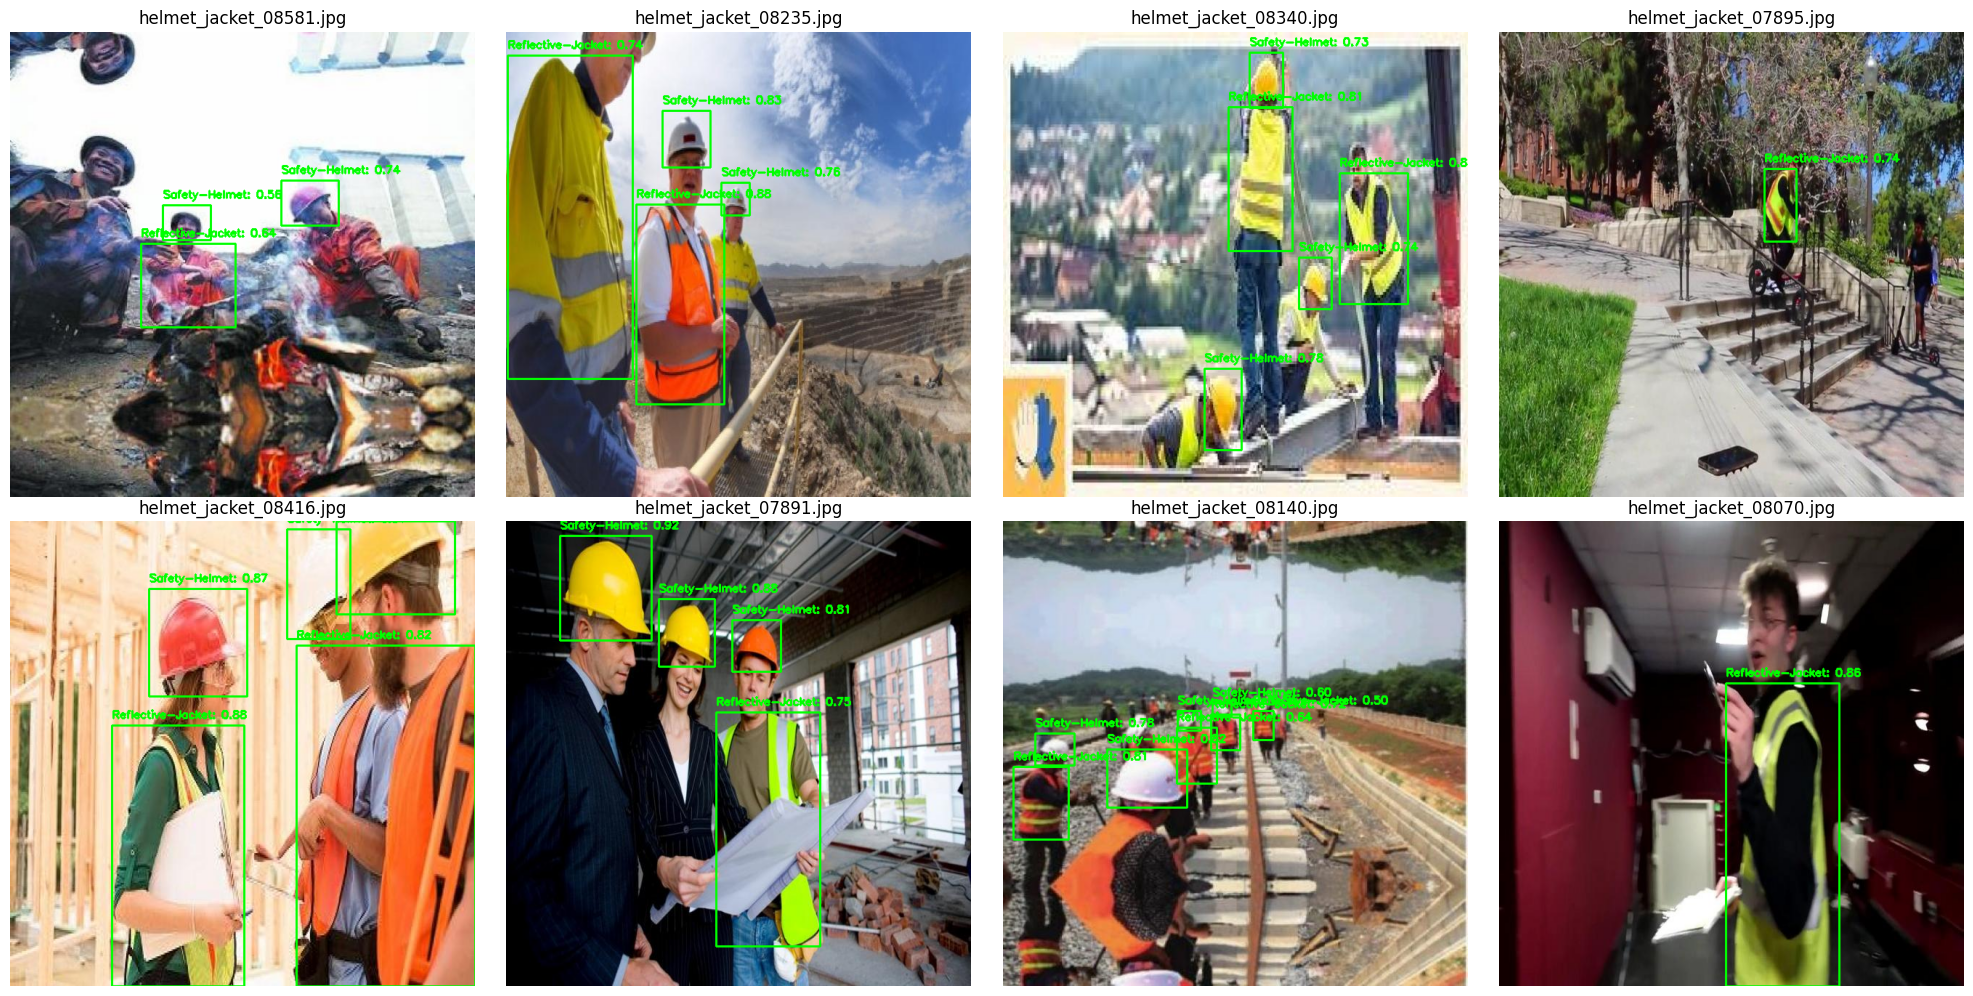

In [18]:
import random

model = YOLO("/content/runs/train/exp/weights/best.pt")

test_images_dir = "/content/safety-Helmet-Reflective-Jacket/test/images"
test_images = random.sample(os.listdir(test_images_dir), 8)

plt.figure(figsize=(20, 10))
for i, img_name in enumerate(test_images):
    img_path = os.path.join(test_images_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model.predict(img_path, conf=0.5)

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        labels = result.boxes.cls.cpu().numpy()
        scores = result.boxes.conf.cpu().numpy()

        for box, label, score in zip(boxes, labels, scores):
            x1, y1, x2, y2 = map(int, box)
            class_name = result.names[int(label)]
            label_text = f"{class_name}: {score:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label_text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_name)

plt.tight_layout()
plt.show()

In [13]:
from google.colab.patches import cv2_imshow

In [19]:
video_path = "/content/test_video.mp4"  # ganti sesuai nama file Anda
cap = cv2.VideoCapture(video_path)

# Simpan output ke file baru
output_path = "/content/output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec video
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Loop frame demi frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Predict objek di frame ini
    results = model.predict(frame, conf=0.5)

    # Ambil hasil dan gambar bounding box
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        labels = result.boxes.cls.cpu().numpy()
        scores = result.boxes.conf.cpu().numpy()

        for box, label, score in zip(boxes, labels, scores):
            x1, y1, x2, y2 = map(int, box)
            class_name = result.names[int(label)]
            label_text = f"{class_name}: {score:.2f}"
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (0, 255, 0), 2)

    # Simpan ke output video
    out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Bersihkan
cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 1 Reflective-Jacket, 50.6ms
Speed: 4.4ms preprocess, 50.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Reflective-Jacket, 24.0ms
Speed: 3.2ms preprocess, 24.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Reflective-Jacket, 24.1ms
Speed: 3.1ms preprocess, 24.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Reflective-Jacket, 24.1ms
Speed: 3.1ms preprocess, 24.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Reflective-Jacket, 24.1ms
Speed: 3.4ms preprocess, 24.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Reflective-Jacket, 20.2ms
Speed: 3.6ms preprocess, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Reflective-Jacket, 20.2ms
Speed: 3.6ms preprocess, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Reflective-Jacket, 20.2ms
S

In [15]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
shutil.copy('output_video.mp4', '/content/drive/MyDrive')
shutil.copy('/content/runs/train/exp/weights/best.pt', '/content/drive/MyDrive')

'/content/drive/MyDrive/last.pt'